# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 19, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import NMF
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data

In [2]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [36]:
tfidf_vectorizer = TfidfVectorizer(min_df=30, stop_words='english')
X = tfidf_vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

## 2. NMF - Nonnegative Matrix Factorization

In [70]:
num_topics = 10
nmf = NMF(n_components=num_topics)

In [71]:
X_reduced = nmf.fit_transform(X.toarray())

In [72]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', X_reduced.shape)

('Original Shape: ', (2369, 1529))
('Reduced Shape: ', (2369, 10))


## 3. Visualizing the reduced data points

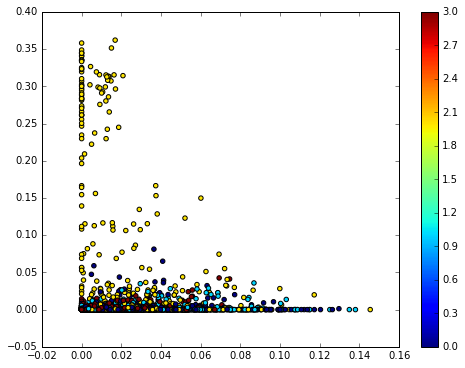

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y)
plt.colorbar()

## 4. Analysis

In [74]:
loadings = nmf.components_

In [75]:
loadings.shape

(10, 1529)

In [79]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(num_topics):
    insens_idx = np.argsort(loadings[i])

    print ('TOPIC ' + str(i))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

TOPIC 0
cwru lines subject organization state posting host nntp university edu

TOPIC 1
n3jxp cadre dsl shameful edu cs gordon banks geb pitt

TOPIC 2
church christian hell believe faith christ bible christians jesus god

TOPIC 3
video problem card monitor quadra scsi se drive apple mac

TOPIC 4
reaction foods berkeley steve dyer superstition chinese sensitivity food msg

TOPIC 5
intelligence aisun3 programs athens mcovingt covington michael uga georgia ai

TOPIC 6
host nntp posting hp ed writes article east sun com

TOPIC 7
org ac riding dog ride dod uk bnr ca bike

TOPIC 8
medical patients science doctor like know disease people time don

TOPIC 9
lady 1983 corn bike com zx chris nj nec behanna

